In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-text-detection-dataset/AI_Detection(1).csv
/kaggle/input/ai-text-detection-model/transformers/ai-text-detection/1/BertClass.pth


In [17]:
df = pd.read_csv('/kaggle/input/ai-text-detection-dataset/AI_Detection(1).csv')

In [18]:
df.head()

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


In [19]:
df.shape

(86053, 2)

In [20]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("google-bert/bert-base-uncased")

In [21]:
# Function to tokenize text using BERT tokenizer
def tokenize_text(text):
    # Tokenize the text using BERT tokenizer
    tokenized_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,  # Add [CLS] and [SEP] tokens
        max_length=200,           # Maximum sequence length
        pad_to_max_length=True,   # Pad sequences to maximum length
        return_attention_mask=True,  # Generate attention masks
        
        return_tensors='pt'       # Return PyTorch tensors
    )
#     tokenized_text = {key: tensor.to(device) for key, tensor in tokenized_text.items()}
    return tokenized_text

# Tokenize text in DataFrame and add tokenized columns
df['tokenized_text'] = df['text'].apply(tokenize_text)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [22]:
df.head()

,text,label,tokenized_text
0,Phones\n\nModern humans today are always on th...,0,"[input_ids, token_type_ids, attention_mask]"
1,This essay will explain if drivers should or s...,0,"[input_ids, token_type_ids, attention_mask]"
2,Driving while the use of cellular devices\n\nT...,0,"[input_ids, token_type_ids, attention_mask]"
3,Phones & Driving\n\nDrivers should not be able...,0,"[input_ids, token_type_ids, attention_mask]"
4,Cell Phone Operation While Driving\n\nThe abil...,0,"[input_ids, token_type_ids, attention_mask]"


In [23]:
df.iloc[0]['tokenized_text']

{'input_ids': tensor([[  101, 11640,  2715,  4286,  2651,  2024,  2467,  2006,  2037,  3042,
          1012,  2027,  2024,  2467,  2006,  2037,  3042,  2062,  2084,  1019,
          2847,  1037,  2154,  2053,  2644,  1012,  2035,  2027,  2079,  2003,
          3793,  2067,  1998,  2830,  1998,  2074,  2031,  2177, 11834,  2015,
          2006,  2591,  2865,  1012,  2027,  2130,  2079,  2009,  2096,  4439,
          1012,  2027,  2024,  2070,  2428,  2919,  8465,  2043,  4933,  6433,
          2043,  2009,  3310,  2000,  1037,  3042,  1012,  2070,  3056,  2752,
          1999,  1996,  2142,  2163,  7221, 11640,  2013,  2465,  4734,  2074,
          2138,  1997,  2009,  1012,  2043,  2111,  2031, 11640,  1010,  2027,
          2113,  2055,  3056, 18726,  2008,  2027,  2031,  1012, 18726,  2066,
          9130, 10474, 16021, 23091,  1998, 10245,  7507,  2102,  1012,  2061,
          2066,  2065,  1037,  2767,  5829,  2185,  1998,  2017,  2215,  2000,
          2022,  1999,  3967,  2017,  

In [24]:
# Separate input IDs and attention masks into distinct columns
df['input_ids'] = df['tokenized_text'].apply(lambda x: x['input_ids'])
df['attention_mask'] = df['tokenized_text'].apply(lambda x: x['attention_mask'])
input_ids = df['input_ids']
attention_mask = df['attention_mask']


input_ids[0]

tensor([[  101, 11640,  2715,  4286,  2651,  2024,  2467,  2006,  2037,  3042,
          1012,  2027,  2024,  2467,  2006,  2037,  3042,  2062,  2084,  1019,
          2847,  1037,  2154,  2053,  2644,  1012,  2035,  2027,  2079,  2003,
          3793,  2067,  1998,  2830,  1998,  2074,  2031,  2177, 11834,  2015,
          2006,  2591,  2865,  1012,  2027,  2130,  2079,  2009,  2096,  4439,
          1012,  2027,  2024,  2070,  2428,  2919,  8465,  2043,  4933,  6433,
          2043,  2009,  3310,  2000,  1037,  3042,  1012,  2070,  3056,  2752,
          1999,  1996,  2142,  2163,  7221, 11640,  2013,  2465,  4734,  2074,
          2138,  1997,  2009,  1012,  2043,  2111,  2031, 11640,  1010,  2027,
          2113,  2055,  3056, 18726,  2008,  2027,  2031,  1012, 18726,  2066,
          9130, 10474, 16021, 23091,  1998, 10245,  7507,  2102,  1012,  2061,
          2066,  2065,  1037,  2767,  5829,  2185,  1998,  2017,  2215,  2000,
          2022,  1999,  3967,  2017,  2064,  2145,  

In [25]:
df.head()
df.iloc[3]['input_ids'].shape

torch.Size([1, 200])

In [26]:
import torch
input_ids = torch.stack(df['input_ids'].tolist())

attention_mask = torch.stack(df['attention_mask'].tolist())

labels = torch.tensor(df['label'].tolist())



**Model Building for classification**


In [27]:
from transformers import BertForSequenceClassification, BertConfig

In [28]:
pretrained_model_name = 'google-bert/bert-base-uncased'

# Initialize the BERT model configuration
config = BertConfig.from_pretrained(pretrained_model_name)

In [29]:
config.num_labels = 1

model = BertForSequenceClassification(config)

In [30]:
# print("Size of input_ids:", input_ids.size())
# print("Size of attention_mask:", attention_mask.size())
print("Size of labels:", labels.size())

Size of labels: torch.Size([86053])


In [33]:
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data.dataset import Subset

dataset = TensorDataset(input_ids, attention_mask, labels)

# Calculate the size of the training set (e.g., 80% of the original dataset)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Create indices for the training and validation sets
indices = list(range(len(dataset)))
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Create Subset objects from the indices
train_subset = Subset(dataset, train_indices)
val_subset = Subset(dataset, val_indices)

# Define batch sizes for training and validation
batch_size_train = 32
batch_size_val = 16  # You can adjust this as needed

# Create DataLoader objects for training and validation
train_loader = DataLoader(train_subset, batch_size=batch_size_train, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size_val, shuffle=False)

In [34]:
# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
criterion = torch. nn.BCELoss()

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(device)

cuda


Epoch 1, Loss: 0.0577630048918929
Epoch 2, Loss: 0.015478690310729085
Epoch 3, Loss: 0.011858617083975988
Epoch 4, Loss: 0.01101471236592646
Epoch 5, Loss: 0.008240254258328108


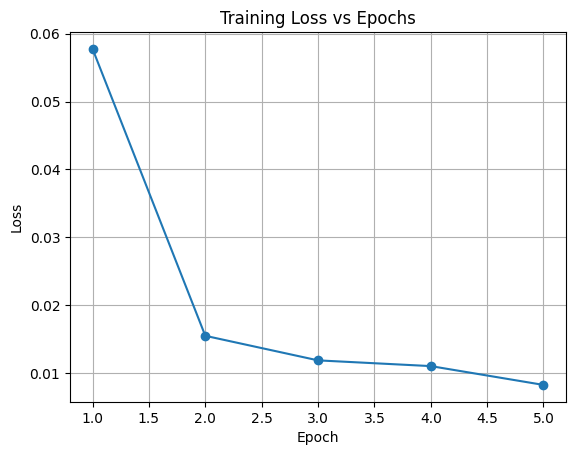

In [37]:
model.train()
num_epochs = 5

# Create empty lists to store loss values and epochs
losses = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch in train_loader:
        batch_input_ids, batch_attention_mask, batch_labels = batch
        batch_input_ids = batch_input_ids.squeeze(1)
        batch_attention_mask = batch_attention_mask.squeeze(1)
        batch_labels = batch_labels.to(torch.float).to(device)
        batch_attention_mask = batch_attention_mask.to(device)
        batch_input_ids = batch_input_ids.to(device)

        # Forward pass
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate epoch loss
        epoch_loss += loss.item()

    # Average epoch loss
    avg_epoch_loss = epoch_loss / len(train_loader)
    losses.append(avg_epoch_loss)

    # Print loss after each epoch
    print(f"Epoch {epoch + 1}, Loss: {avg_epoch_loss}")

# Plot loss versus epochs
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.grid(True)
plt.show()


In [39]:
model.eval()  # Switch to evaluation mode
total_loss = 0.0
total_correct = 0
total_samples = 0

with torch.no_grad():  # Disable gradient tracking
    for batch in val_loader:
        batch_input_ids, batch_attention_mask, batch_labels = batch
        batch_input_ids = batch_input_ids.squeeze(1)
        batch_attention_mask = batch_attention_mask.squeeze(1)
        batch_labels = batch_labels.to(torch.float).to(device)
        batch_attention_mask = batch_attention_mask.to(device)
        batch_input_ids = batch_input_ids.to(device)

        # Forward pass
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        logits = outputs.logits

        # Accumulate total loss
        total_loss += loss.item()

        # Calculate accuracy
        predicted_labels = (torch.sigmoid(logits) > 0.5).float()  # Assuming binary classification
        total_correct += (predicted_labels == batch_labels).sum().item()
        total_samples += batch_labels.size(0)

# Calculate average loss and accuracy
avg_loss = total_loss / len(val_loader)
accuracy = total_correct / total_samples

print(f"Validation Loss: {avg_loss}, Accuracy: {accuracy}")


Validation Loss: 0.061982927855606385, Accuracy: 13.918947184939864
